AI 395T Assignment 5: Self Learning Tutorial
====================
***Author: Cyrus Rupa***

**EID:** *csr2723*, **E-mail:** *crupa@utexas.edu*

## Setup

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import scipy
import keras as keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.callbacks import History
from sklearn.model_selection import KFold

# Test if GPU hooked successfully
if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")
print(tf.config.list_physical_devices('GPU'))

2024-11-02 18:48:59.034224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 18:48:59.059061: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 18:48:59.066911: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 18:48:59.161045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Default GPU Device: /device:GPU:0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1730587742.410717     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587742.625241     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587742.625353     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587742.826510     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587742.826628     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-02

Get the Population of Diagnoses.
Due to resource limitations on my PC, I need to drop ~70,000 records. This should not effect the accuracy of the model as its only 10% of the data. 

In [2]:
diagnoses = pd.read_csv(r'/OneDrive/MSAI/AI 395T/Assignments/New MIMIC III/DIAGNOSES_ICD.csv')
diagnoses_labels = pd.read_csv(r'/OneDrive/MSAI/AI 395T/Assignments/New MIMIC III/D_ICD_DIAGNOSES.csv')
obesity_codes = ["27800", "27801", "27802", "27803", "64910", "64911", "64912", "64913", "64914"]
icd9_dict = diagnoses_labels.set_index('ICD9_CODE')['SHORT_TITLE'].to_dict()
pop_df = diagnoses.drop(columns= ['ROW_ID', 'HADM_ID', 'SEQ_NUM'])
pop_df = pop_df.head(len(pop_df) - 80000)
pop_df=pop_df.dropna()
pop_df

,SUBJECT_ID,ICD9_CODE
0,109,40301
1,109,486
2,109,58281
3,109,5855
4,109,4254
...,...,...
571042,85892,5990
571043,85892,9331
571044,85892,78720
571045,85892,34690


In [3]:
result = pop_df.pivot_table(index='SUBJECT_ID', columns='ICD9_CODE', aggfunc='size', fill_value=False)
# Rename columns if necessary to remove extra "ICD9_CODE"
result.columns.name = None

result

,0030,0031,0038,0039,0041,0048,0049,0051,00581,0059,...,V8709,V872,V8741,V8745,V8801,V8812,V8821,V902,V9081,V9089
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86579,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df_final = result
obesity_codes = ["27800", "27801", "27802", "27803"]
X = (df_final.drop(columns= obesity_codes))
y = df_final[obesity_codes].any(axis=1).values

# Make sure some patients are not obese
true_count = np.sum(y == True)
false_count = np.sum(y == False)
print("Obese: ", true_count)
print("Non-obese: ", false_count)



Obese:  1854
Non-obese:  39993


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X Train shape: ", X_train.shape)
print("X Test shape: ", X_test.shape)
print("y Train shape: ", y_train.shape)
print("y Test shape: ", y_test.shape)


Preform Dimensional Reduction

In [6]:
# Define the autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)  # Compressed representation
decoded = Dense(256, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, verbose=0)

encoder = Model(input_layer, encoded)

X_train_reduced = encoder.predict(X_train)
X_test_reduced = encoder.predict(X_test)

print(f'X_train_reduced shape: {X_train_reduced.shape}')  # This should be (34582, new_dimension)
print(f'y_train shape: {y_train.shape}')                  # This should be (34582,)

print(f'X_test_reduced shape: {X_test_reduced.shape}')    # This should be (6103, new_dimension)
print(f'y_test shape: {y_test.shape}')                    # This should be (6103,)


I0000 00:00:1730587787.973143     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587787.973340     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587787.973395     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730587787.973707     523 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-02 18:49:47.973736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2112] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.

1047/1047 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
X_train_reduced shape: (33477, 64)
y_train shape: (33477,)
X_test_reduced shape: (8370, 64)
y_test shape: (8370,)


In [7]:
def train_test_model(hyper_parms, X_train_reduced, X_test_reduced, y_train, y_test, verbosity = 0):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                restore_best_weights = True, 
                                                patience = 15, min_delta = 1e-15)
    # Assuming X and y are already defined with the appropriate shape
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_results = []
    # Lists to store training and validation metrics for plotting
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for train_index, val_index in kf.split(X):
    
        # Build the model
        model = Sequential()
        model.add(Input(shape=(64,)))  # Adjust according to your feature size
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.22))
        model.add(Dense(16, activation='relu'))
        model.add(Dropout(0.22))
        model.add(Dense(1, activation='sigmoid'))
    
        # Compile the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
        # Train the model
        history = model.fit(X_train_reduced, y_train, epochs=hyper_parms['epochs'], \
                            batch_size=hyper_parms['batch_size'], \
                            validation_data=(X_test_reduced, y_test), verbose=verbosity)

        # Store the training and validation metrics for plotting
        train_losses.append(history.history['loss'])
        val_losses.append(history.history['val_loss'])
        train_accuracies.append(history.history['accuracy'])
        val_accuracies.append(history.history['val_accuracy'])
    
        # Evaluate the model
        val_loss, val_accuracy = model.evaluate(X_test_reduced, y_test, verbose=verbosity)
        fold_results.append(val_accuracy)
    
    
    # Print the average accuracy across all folds
    #print(f"epochs:{hyper_parms['epochs']}, batch_size:{hyper_parms['batch_size']} Mean validation accuracy: {np.mean(fold_results)}")
    print(f"  Mean validation accuracy: {np.mean(fold_results)}")
    return (np.mean(fold_results), train_losses, val_losses, train_accuracies, val_accuracies)

    





In [8]:
#e:50 b:256
hyper_parms = { 'epochs': 50 ,
                    'batch_size': 32}
fold_results, train_losses, val_losses, train_accuracies, val_accuracies = \
    train_test_model(hyper_parms, X_train_reduced, X_test_reduced, y_train, y_test, verbosity=0)

  Mean validation accuracy: 0.9560812473297119


Paramaters: epochs:50 batch_size:32 


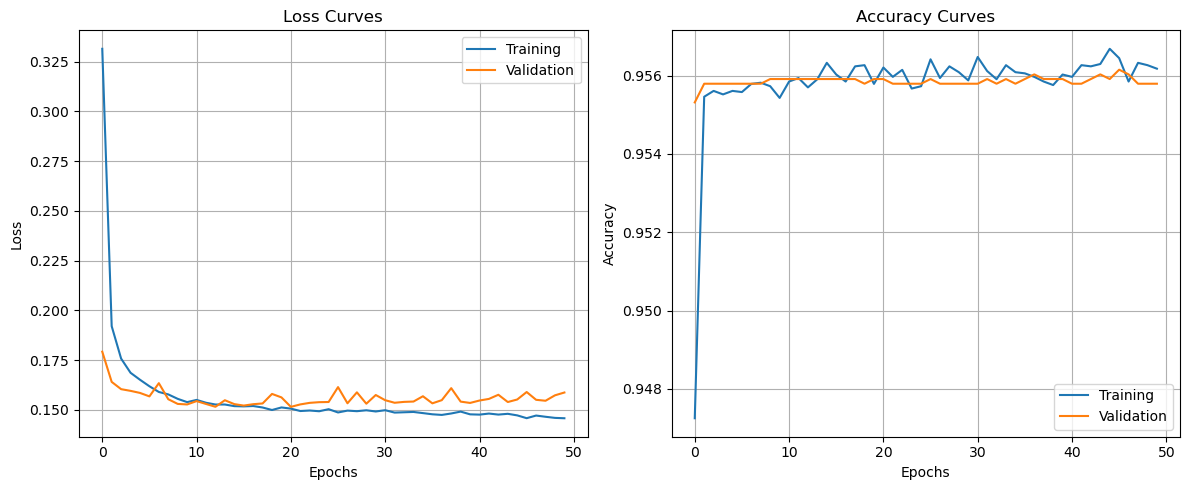

In [9]:
print(f"Paramaters: epochs:{hyper_parms['epochs']} batch_size:{hyper_parms['batch_size']} ")
# Plotting Loss Curves
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses[-1], label=f'Training')
plt.plot(val_losses[-1], label=f'Validation')
#for i in range(len(train_losses)):
#    plt.plot(train_losses[i], label=f'Train Fold {i+1}')
#    plt.plot(val_losses[i], label=f'Validation Fold {i+1}', linestyle='--')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies[-1], label=f'Training')
plt.plot(val_accuracies[-1], label=f'Validation')
#for i in range(len(train_accuracies)):
#    plt.plot(train_accuracies[i], label=f'Train Fold {i+1}')
#    plt.plot(val_accuracies[i], label=f'Validation Fold {i+1}', linestyle='--')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig(f"epochs:{hyper_parms['epochs']} batch_size:{hyper_parms['batch_size']} graph")
plt.show()
    

Tuning Hyper Parameters

In [ ]:
tuning = False
if tuning:
    epochs = [1, 5, 8, 10, 50]
    big_epoch = [50, 75, 100]
    batch_sizes = [16, 32, 64, 125, 256]
    results = []
    for i, epoch in enumerate(big_epoch):
        for j, batch_size in enumerate(batch_sizes):
            print(f"Testing epoch:{epoch}, batch_size:{batch_size}")
            hyper_parms = { 'epochs': epoch ,
                           'batch_size': batch_size}
            fold_results, train_losses, val_losses, train_accuracies, val_accuracies = \
                train_test_model(hyper_parms, X_train_reduced, X_test_reduced, y_train, y_test)
            results.append(fold_results)
    print(results)

#Reults from epoch
"""
Testing epoch:1, batch_size:16
  Mean validation accuracy: 0.9564458847045898
Testing epoch:1, batch_size:32
  Mean validation accuracy: 0.9564704537391663
Testing epoch:1, batch_size:64
  Mean validation accuracy: 0.9564950466156006
Testing epoch:1, batch_size:125
  Mean validation accuracy: 0.9563229799270629
Testing epoch:1, batch_size:256
  Mean validation accuracy: 0.9561509132385254
Testing epoch:5, batch_size:16
  Mean validation accuracy: 0.9564704656600952
Testing epoch:5, batch_size:32
  Mean validation accuracy: 0.9564950466156006
Testing epoch:5, batch_size:64
  Mean validation accuracy: 0.9564950466156006
Testing epoch:5, batch_size:125
  Mean validation accuracy: 0.9564704656600952
Testing epoch:5, batch_size:256
  Mean validation accuracy: 0.9564704656600952
Testing epoch:8, batch_size:16
  Mean validation accuracy: 0.9568637251853943
Testing epoch:8, batch_size:32
  Mean validation accuracy: 0.956519615650177
Testing epoch:8, batch_size:64
  Mean validation accuracy: 0.9564950466156006
Testing epoch:8, batch_size:125
  Mean validation accuracy: 0.9564950466156006
Testing epoch:8, batch_size:256
  Mean validation accuracy: 0.9564950466156006
Testing epoch:10, batch_size:16
  Mean validation accuracy: 0.9569866180419921
Testing epoch:10, batch_size:32
  Mean validation accuracy: 0.956519615650177
Testing epoch:10, batch_size:64
  Mean validation accuracy: 0.9564458847045898
Testing epoch:10, batch_size:125
  Mean validation accuracy: 0.9564950466156006
Testing epoch:10, batch_size:256
  Mean validation accuracy: 0.9563967227935791
Testing epoch:50, batch_size:16
  Mean validation accuracy: 0.957551908493042
Testing epoch:50, batch_size:32
  Mean validation accuracy: 0.957945191860199
Testing epoch:50, batch_size:64
  Mean validation accuracy: 0.957551920413971
Testing epoch:50, batch_size:125
  Mean validation accuracy: 0.9578468680381775
Testing epoch:50, batch_size:256
  Mean validation accuracy: 0.9571094870567322

Testing epoch:50, batch_size:16
  Mean validation accuracy: 0.9570111870765686
Testing epoch:50, batch_size:32
  Mean validation accuracy: 0.9567899823188781
Testing epoch:50, batch_size:64
  Mean validation accuracy: 0.9569128632545472
Testing epoch:50, batch_size:125
  Mean validation accuracy: 0.9570111632347107
Testing epoch:50, batch_size:256
  Mean validation accuracy: 0.9566425085067749
Testing epoch:75, batch_size:16
  Mean validation accuracy: 0.9570849180221558
Testing epoch:75, batch_size:32
  Mean validation accuracy: 0.9571586608886719
Testing epoch:75, batch_size:64
  Mean validation accuracy: 0.9570603370666504
Testing epoch:75, batch_size:125
  Mean validation accuracy: 0.9570849180221558
Testing epoch:75, batch_size:256
  Mean validation accuracy: 0.9569620251655578
Testing epoch:100, batch_size:16
  Mean validation accuracy: 0.9569374442100524
Testing epoch:100, batch_size:32
  Mean validation accuracy: 0.9569128751754761
Testing epoch:100, batch_size:64
  Mean validation accuracy: 0.9567899584770203
Testing epoch:100, batch_size:125
  Mean validation accuracy: 0.9572569727897644
Testing epoch:100, batch_size:256
  Mean validation accuracy: 0.9570849180221558
[0.9570111870765686, 0.9567899823188781, 0.9569128632545472, 0.9570111632347107, 0.9566425085067749, 0.9570849180221558, 0.9571586608886719, 0.9570603370666504, 0.9570849180221558, 0.9569620251655578, 0.9569374442100524, 0.9569128751754761, 0.9567899584770203, 0.9572569727897644, 0.9570849180221558]
"""
print("done")
# We can see here that the global maximum occurs at Testing epoch:50, batch_size:32
#  Mean validation accuracy: 0.957945191860199

Chcking Popular diseases for obese patients.


   SUBJECT_ID                                       ALL_DISEASES
0          32  [5191, 496, 42731, 4538, 53081, 78057, 4019, 2...
1         107  [53291, 5856, 99681, 40391, 2851, V4511, V4582...
2         195  [3962, 42731, 39891, 00845, 5570, 0383, 5750, ...
3         199  [41071, 42823, 4271, 4280, 41401, 7856, 500, 4...
4         246  [57149, 1550, 25002, 5715, 5680, 2720, 4019, V...


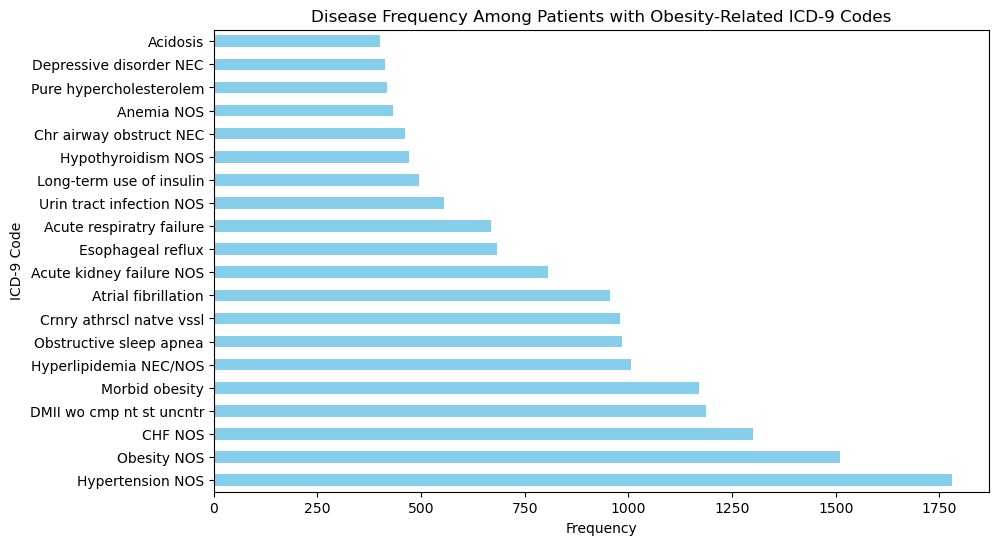

In [10]:
# Make sure to add random sample of people!!! All these people are obese!
obese_df = diagnoses[diagnoses['ICD9_CODE'].isin(obesity_codes)]['SUBJECT_ID'].unique()
filtered_df = diagnoses[diagnoses['SUBJECT_ID'].isin(obese_df)]
disease_summary_df = filtered_df.groupby('SUBJECT_ID')['ICD9_CODE'].unique().reset_index()
disease_summary_df.columns = ['SUBJECT_ID', 'ALL_DISEASES']
disease_summary_df = disease_summary_df.dropna()
print(disease_summary_df.head())

# Count the occurrences of each ICD-9 code
disease_counts = filtered_df['ICD9_CODE'].value_counts().head(20)
short_titles = [icd9_dict[code] for code in disease_counts.index]
# Plot the frequency of each disease
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='barh', color='skyblue')
plt.title('Disease Frequency Among Patients with Obesity-Related ICD-9 Codes')
plt.ylabel('ICD-9 Code')
plt.xlabel('Frequency')
plt.yticks(ticks = range(0,len(disease_counts.index)) ,labels=short_titles)

plt.show()